In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
img=cv2.imread('DATA\car_plate.jpg')

In [6]:
def display(img):
  fig=plt.figure(figsize=(12,10))
  ax=fig.add_subplot(111)
  new_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  ax.imshow(new_img)

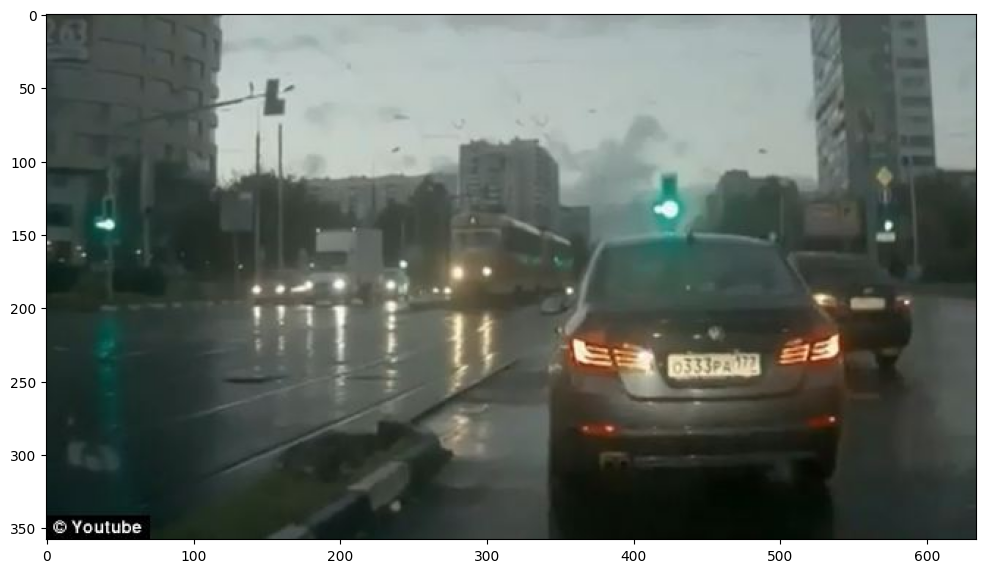

In [7]:
display(img)

In [8]:
plate_cascade=cv2.CascadeClassifier('DATA\haarcascades\haarcascade_russian_plate_number.xml')


In [9]:
def detect_plate(img):
  plate_img=img.copy()
  plate_rects=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
  for (x,y,w,h) in plate_rects:
    cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255),4)
  return plate_img

In [10]:
result=detect_plate(img)

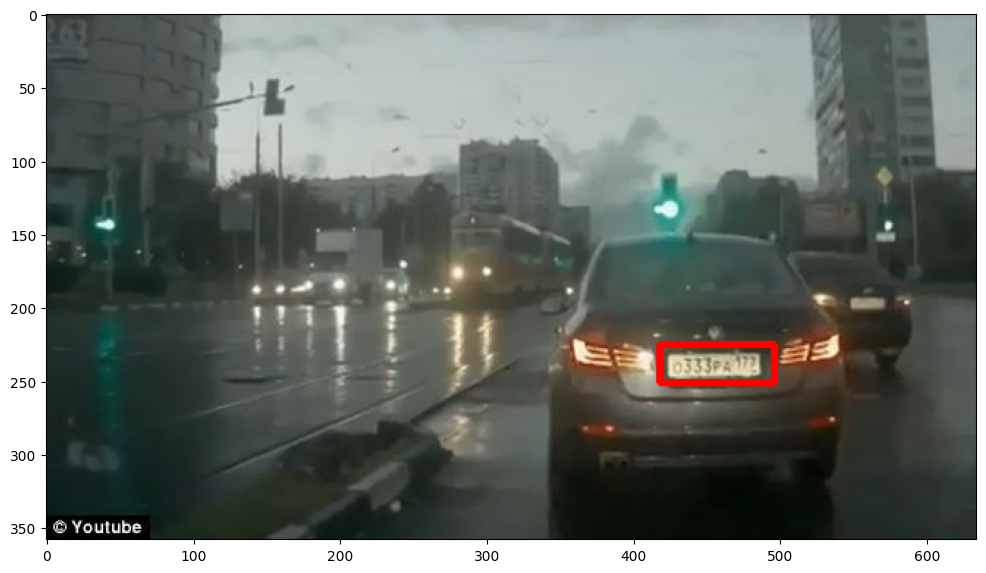

In [11]:
display(result)

In [12]:
def detect_and_blue(img):
  plate_img=img.copy()
  roi=img.copy()

  plate_rects=plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)

  for (x,y,w,h) in plate_rects:
    roi=roi[y:y+h,x:x+w]
    blurred_roi=cv2.medianBlur(roi,7)


    plate_img[y:y+h,x:x+w]=blurred_roi

  return plate_img
    




  

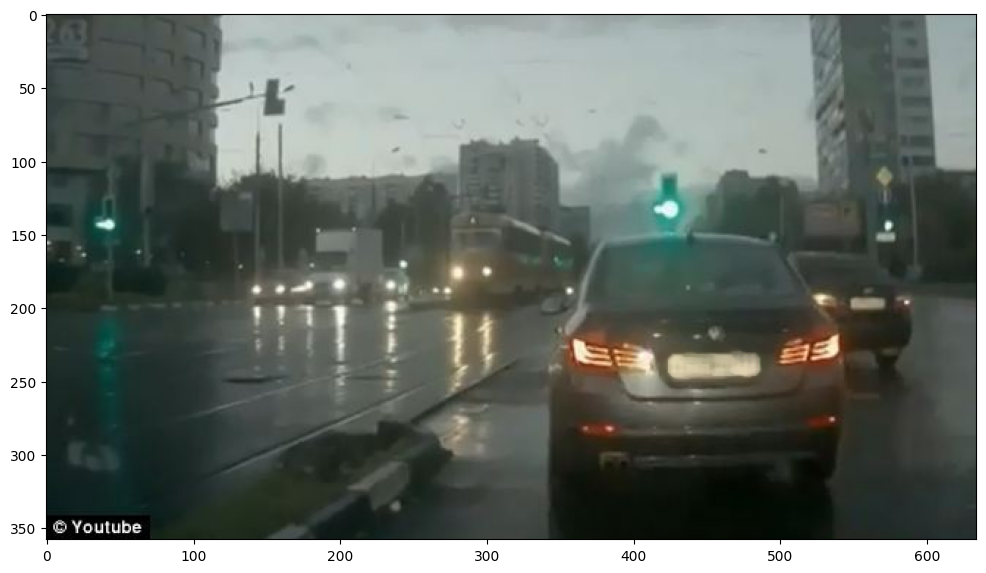

In [13]:
result=detect_and_blue(img)

display(result)